In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from scipy.interpolate import spline

##### Step1 数据清洗

###### 去除观看次数不到50条的记录

In [2]:
ratings = pd.read_csv('E:/dataset/ml-latest-small/ratings.csv')
# ratings.timestamp = ratings.timestamp.apply(lambda x: time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(x)))
ratings

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [3]:
movie_count = ratings.movieId.value_counts()
movie_count = movie_count[movie_count >= 50]
movie_count

356      341
296      324
318      311
593      304
260      291
480      274
2571     259
1        247
527      244
589      237
1196     234
110      228
1270     226
608      224
2858     220
1198     220
780      218
1210     217
588      215
457      213
2959     202
590      202
50       201
47       201
4993     200
858      200
150      200
364      200
380      198
32       196
        ... 
3535      51
35836     51
261       51
1748      51
6863      51
1233      51
2539      51
2541      51
2080      51
5991      51
1333      51
2005      51
1396      51
5299      51
52        51
4085      51
2109      51
74458     51
914       51
2770      51
68358     51
2580      50
1094      50
552       50
969       50
333       50
628       50
1228      50
6373      50
673       50
Name: movieId, Length: 453, dtype: int64

In [4]:
ratings = ratings[ratings['movieId'].isin(movie_count.index)]
movie_rating = ratings.loc[:, ['movieId', 'rating']]
# 筛选后的电影平均
average_rating = movie_rating.groupby('movieId').mean()
# 电影总体平均分
# mean = movie_rating.rating.mean()
# 各个电影的标准差
std = movie_rating.groupby('movieId').std()

###### 按照时间顺序观察用户打分情况

In [5]:
pd.set_option('display.max_rows', None)
user_ratings = ratings[ratings.userId == 500].sort_values('timestamp')
# user_ratings.timestamp = user_ratings.timestamp.apply(lambda x: time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(x)))
user_ratings

,userId,movieId,rating,timestamp
71241,500,2572,4.5,1228920422
71167,500,344,2.5,1228920531
71273,500,3897,3.5,1228920601
71234,500,2324,5.0,1228920623
71179,500,593,1.5,1228920712
71168,500,356,5.0,1228920719
71313,500,5952,1.0,1228920759
71302,500,4963,3.5,1228920772
71332,500,8360,3.5,1228920776
71213,500,1580,0.5,1228920793


###### 观察用户观看电影的平均分的变化趋势

In [6]:
user_movie = user_ratings.movieId.tolist()
user_aver_rating = average_rating.loc[user_movie]
user_aver_rating

,rating
movieId,
2572,3.473684
344,2.871429
3897,3.888889
2324,4.025253
593,4.138158
356,4.054252
5952,4.061170
4963,3.880769
8360,3.574074


In [7]:
basetime = user_ratings.iloc[0, 3]
user_ratings.timestamp = user_ratings.timestamp - basetime
user_rating_plt = user_ratings.loc[:, ['movieId', 'rating']]
user_rating_plt = user_rating_plt.set_index('movieId')

In [8]:
'''
观察到此时上下波动比较大，尝试用户评分归一化处理
'''
user_rating_plt['average'] = user_aver_rating.rating
user_rating_plt['normal'] = (user_rating_plt.rating - user_aver_rating.rating) / std.rating
user_rating_plt

,rating,average,normal
movieId,,,
2572,4.5,3.473684,0.951078
344,2.5,2.871429,-0.336215
3897,3.5,3.888889,-0.455996
2324,5.0,4.025253,1.042433
593,1.5,4.138158,-3.016904
356,5.0,4.054252,1.085170
5952,1.0,4.061170,-2.919801
4963,3.5,3.880769,-0.482307
8360,3.5,3.574074,-0.074752


##### 进行用户评分归一化处理

In [10]:
user_min = user_rating_plt.rating.min()
user_max = user_rating_plt.rating.max()
user_rating_plt['to1'] = (user_rating_plt.rating - user_min) / (user_max - user_min)
user_rating_plt['time'] = np.arange(len(user_rating_plt))
user_rating_plt

,rating,average,normal,to1,time
movieId,,,,,
2572,4.5,3.473684,0.951078,0.888889,0
344,2.5,2.871429,-0.336215,0.444444,1
3897,3.5,3.888889,-0.455996,0.666667,2
2324,5.0,4.025253,1.042433,1.000000,3
593,1.5,4.138158,-3.016904,0.222222,4
356,5.0,4.054252,1.085170,1.000000,5
5952,1.0,4.061170,-2.919801,0.111111,6
4963,3.5,3.880769,-0.482307,0.666667,7
8360,3.5,3.574074,-0.074752,0.666667,8


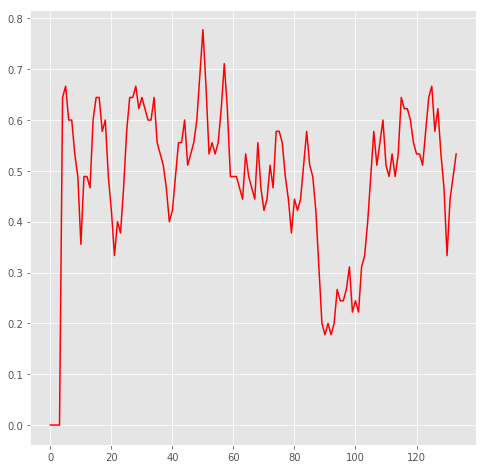

In [ ]:
moving_average = user_rating_plt.to1.rolling(window=5).mean()
moving_average = moving_average.fillna(0)
plt.style.use('ggplot')
%matplotlib inline
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(user_rating_plt.time, moving_average, color='red')